# Определение перспективного тарифа для телеком-компании

**Содержание**

**[1. Обзор данных](#1)**

**[1.1 Общие выводы по качеству имеющихся данных](#1f)**


**[2. Подготовка данных](#2)**

**[2.1. Приведение данных к нужным типам](#2.1)**

**[2.2. Введение дополнительных категорий](#2.2)**

**[2.3. Подсчет показателей для каждого абонента](#2.3)**

**[Выводы по подготовке данных](#2f)**


**[3. Анализ данных](#3)**

**[3.1. Расчет статистических показателей для голосового трафика](#3.1)**

**[3.2. Расчет статистических показателей для сообщений](#3.2)**

**[3.3. Расчет статистических показателей для интернет трафика](#3.3)**

**[3.4. Сведение показателей среднего количества, дисперсии и стандартного отклонения в общую таблицу](#3.4)**

**[3.5. Объединение таблиц и расчет расходов абонентов](#3.5)**

**[3.6. Сведение статистических показателей среднемесячных расходов абонентов](#3.6)**

**[Выводы по анализу данных](#3f)**


**[4. Проверка гипотез](#4)**

**[4.1. Проверка статистической гипотезы о сопоставимости выручки различных тарифных планов](#4.1)**

**[4.2. Проверка статистической гипотезы о сопоставимости расходов на мобильную связь абонентов различных регионов](#4.2)**

**[Выводы по проверке гипотез](#4f)**


**[5. Общий вывод](#5)**


**Заказчик** — Коммерческий департамент компании «Мегалайн» (федеральный оператор сотовой связи).

**Цель Заказчика.** Оптимальное распределение рекламного бюджета на основании данных об эффективности тарифных планов.

**Цель исследования.** Из исследуемых тарифных планов определение наиболее доходного.

**Задачи**
* Определить средние за месяц расходы абонента на услуги мобильной связи и провести сравнительный анализ данного показателя для абонентов рассматриваемых тарифных планов
* Определить и провести сравнительный анализ среднемесячных показателей голосового трафика абонентов рассматриваемых тарифных планов
* Определить и провести сравнительный анализ среднемесячных показателей потребления услуг по отправке сообщений и по передачи данных абонентов рассматриваемых тарифных планов
* Проверить статистическую гипотезу о сопоставимости выручки различных тарифных планов
* Проверить статистическую гипотезу о сопоставимости расходов на мобильную связь абонентов различных регионов.


**Входные данные от Заказчика.** Пять файлов в формате .csv со статистикой о голосовых вызовах, сообщениях, интернет-сессиях абонентов.

**Ожидаемый результат.** Определен более эффективных тарифный план

## Обзор данных <a id='1'></a>

1. Открыть таблицы 
2. Изучить структуру данных по десяти первым строкам
3. Изучить структуру данных методом `info()`

**Описание тарифов**

**Тариф «Смарт»**
- Ежемесячная плата: 550 рублей
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
- Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей
    
**Уточнения**
- продолжительность каждого вызова округляется до минут в большую сторону
- размер веб-трафика за месяц округляется до гигабайт в большую сторону


**Описание данных**

**Таблица `users` (информация о пользователях)**:
- `ser_id` — уникальный идентификатор пользователя
- `first_name` — имя пользователя
- `last_name` — фамилия пользователя
- `age` — возраст пользователя (годы)
- `reg_date` — дата подключения тарифа (день, месяц, год)
- `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- `city` — город проживания пользователя
- `tariff` — название тарифного плана

**Таблица `calls` (информация о звонках)**:
- `id` — уникальный номер звонка
- `call_date` — дата звонка
- `duration` — длительность звонка в минутах
- `user_id` — идентификатор пользователя, сделавшего звонок

**Таблица `messages` (информация о сообщениях)**:
- `id` — уникальный номер сообщения
- `message_date` — дата сообщения
- `user_id` — идентификатор пользователя, отправившего сообщение

**Таблица `internet` (информация об интернет-сессиях)**:
- `id` — уникальный номер сессии
- `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах)
- `session_date` — дата интернет-сессии
- `user_id` — идентификатор пользователя

**Таблица `tariffs` (информация о тарифах)**:
- `tariff_name` — название тарифа
- `rub_monthly_fee` — ежемесячная абонентская плата в рублях
- `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату
- `messages_included` — количество сообщений в месяц, включённых в абонентскую плату
- `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета
- `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [1]:
# Импотрт библиотек
import pandas as pd
import numpy as np
import seaborn as sms
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
# Прочитать файлы
df_users = pd.read_csv('/datasets/users.csv')
df_calls = pd.read_csv('/datasets/calls.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')

Поочередно выгрузим первые пять строк каждого файла

In [3]:
display(df_users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [4]:
display(df_calls.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
display(df_messages.head())

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [6]:
display(df_internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
display(df_tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Поочередно исследуем каждый файл методом `info()`

In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Проверим уникальность запитсей в столбце "city"
df_users['city'].sort_values().unique()

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

Общие выводы по качеству имеющихся данных таблицы `users`
1. Таблица содержит 8 столбцов и 500 строк
2. Заголовки столбцов корректны и отражают суть данных
3. Столбец `churn_date` содержит технические пропуски, которые говорят о действии контракта
4. **В столбцах `churn_date`, `reg_date` не корректный тип данных**
5. **Требуется проверка на дубликаты**
6. В столбцах нет неявных дублей.

In [10]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Общие выводы по качеству имеющихся данных таблицы `calls`
1. Таблица содержит 4 столбца и 202 607 строк
2. Заголовки столбцов корректны и отражают суть данных
3. Столбцы не содержат пропусков
4. **В столбце `call_date` не корректный тип данных**
5. **Требуется проверка на дубликаты**
6. В столбцах нет неявных дублей.

In [11]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Общие выводы по качеству имеющихся данных таблицы `messages`
1. Таблица содержит 3 столбца и 123 036 строк
2. Заголовки столбцов корректны и отражают суть данных
3. Столбцы не содержат пропусков
4. **В столбце `message_date` не корректный тип данных**
5. **Требуется проверка на дубликаты**
6. В столбцах нет неявных дублей.

In [12]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Общие выводы по качеству имеющихся данных таблицы `internet`
1. Таблица содержит 5 столбцов и 149 396 строк
2. Заголовки столбцов корректны и отражают суть данных
3. Столбцы не содержат пропусков
4. **В столбце `session_date` не корректный тип данных**
5. **Требуется проверка на дубликаты**
6. В столбцах нет неявных дублей.

In [13]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Общие выводы по качеству имеющихся данных таблицы `tariffs`
1. Таблица содержит 7 столбцов и 2 строки
2. Заголовки столбцов корректны и отражают суть данных
3. Столбцы не содержат пропусков
4. Столбцы содержат корректные типы данных
5. В столбцах нет дублей.

### Общие выводы по качеству имеющихся данных <a id='1f'></a>

Предоставлено пять таблиц, содержащих данные по использованию услуг мобильной связи пятьюстами абонентами. Таблицы содержит от 3 до 8 столбцов и от 2 до 202 607 строк. Заголовки столбцов корректны и отражают суть данных

Только столбец `churn_date` таблицы `users` содержит технические пропуски, которые говорят о действии контракта

В следующих столбцах требуется изменение типа данных на `date`:
    * `churn_date` (`users`)
    * `reg_date` (`users`)
    * `call_date` (`calls`)
    * `message_date` (`messages`)
    * `session_date` (`internet`)

В таблицах нет неявныех дублей, но требуется проыерка на наличие дубликатов.

## Подготовка данных <a id='2'></a>

1. Привести данные к нужным типам
2. Ввести дополнительные категории:
    - месяц
    - округленная сумма минут
3. Посчитать показатели для каждого абонента:
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - общую помесячную выручку 

### Приведение данных к нужным типам <a id='2.1'></a>

In [14]:
# Изменеие типов данных таблицы users
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format=('%Y-%m-%d'))
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [15]:
# Изменеие типов данных таблицы calls
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format=('%Y-%m-%d'))
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [16]:
# Изменеие типов данных таблицы messages
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format=('%Y-%m-%d'))
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [17]:
# Изменеие типов данных таблицы internet
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format=('%Y-%m-%d'))
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


### Введение дополнительных категорий <a id='2.2'></a>

Добавим в таблицы `calls`, `messages`, `internet` столбцы месяца использования тарифного плана преобразуем значения в новых столбцах в числовой тип.

In [18]:
# Добавим в таблицу calls столбeц месяца совершения вызова
df_calls['month_call'] = df_calls['call_date'].dt.month
# Заменим знначения на числовой тип
df_calls['month_call'] = df_calls['month_call'].astype('int')

In [19]:
display(df_calls.head())

,id,call_date,duration,user_id,month_call
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [20]:
# Добавим в таблицу messages столбeц месяца отправки сообщения
df_messages['month_messag'] = df_messages['message_date'].dt.month
# Заменим знначения на числовой тип
df_messages['month_messag'] = df_messages['month_messag'].astype('int')

In [21]:
display(df_messages.head())

,id,message_date,user_id,month_messag
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [22]:
# Добавим в таблицу internet столбeц месяца скачивания данных
df_internet['month_session'] = df_internet['session_date'].dt.month
# Заменим знначения на числовой тип
df_internet['month_session'] = df_internet['month_session'].astype('int')

In [23]:
display(df_internet.head())

,Unnamed: 0,id,mb_used,session_date,user_id,month_session
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


### Подсчет показателей для каждого абонента <a id='2.3'></a>

- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- общую помесячную выручку

**Количество сделанных звонков и израсходованных минут разговора по месяцам**

- Добавим в таблицу `calls` столбeц с округленным вверх значением количества минут
- Добавим в таблицу `calls` столбцы `city`, `tariff` из таюлицы `users`

In [24]:
# Добавим в таблицу calls столбeц с округленным вверх значением количества минут
df_calls['duration_up'] = df_calls['duration']
df_calls['duration_up'] = np.ceil(df_calls['duration_up'])

# Добавим в таблицу calls столбцы city tariff из таюлицы users
df_calls_all = df_calls.merge(df_users, on='user_id', how='left')
df_calls_all.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis=1, inplace=True)

In [25]:
# Удадим из получекнной таблицы строки с нулевым значение дительности вызова
df_calls_all = df_calls_all[df_calls_all['duration'] != 0].copy()

In [26]:
display(df_calls_all.head())

,id,call_date,duration,user_id,month_call,duration_up,city,tariff
2,1000_2,2018-06-11,2.85,1000,6,3.0,Краснодар,ultra
3,1000_3,2018-09-21,13.80,1000,9,14.0,Краснодар,ultra
4,1000_4,2018-12-15,5.18,1000,12,6.0,Краснодар,ultra
7,1000_7,2018-08-22,18.31,1000,8,19.0,Краснодар,ultra
8,1000_8,2018-09-15,18.44,1000,9,19.0,Краснодар,ultra


**Для каждого тарифного плана провдем анализ среднемесячного количества и длительности звонков**

Сравним количество звонков для тарфов `ultra` и `smart`

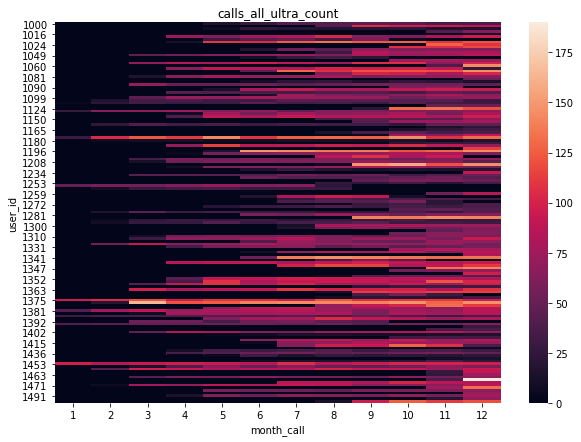

In [27]:
# Для тарифного плана ultra определим среднемесячное количество вызовов 
# и выведим значение на тепловую карту
df_calls_all_ultra_count = df_calls_all[df_calls_all['tariff'] == 'ultra'].pivot_table(index='user_id', columns='month_call', values='duration', aggfunc='count')
df_calls_all_ultra_count = df_calls_all_ultra_count.fillna(0)

plt.figure(figsize=(10, 7))
heatmap = sms.heatmap(df_calls_all_ultra_count)
heatmap.set_title('calls_all_ultra_count')
plt.show()

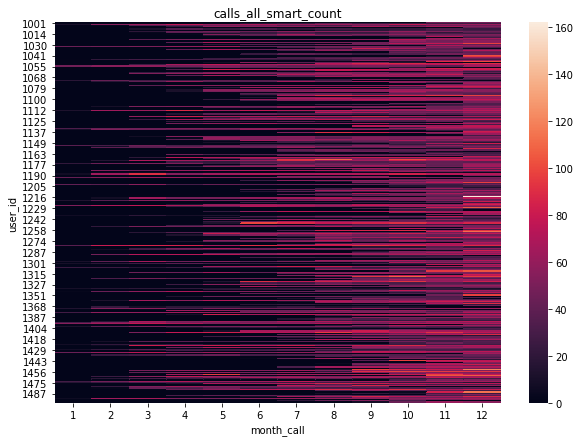

In [28]:
# Для тарифного плана smart определим среднемесячное количество вызовов 
# и выведим значение на тепловую карту
df_calls_all_smart_count = df_calls_all[df_calls_all['tariff'] == 'smart'].pivot_table(index='user_id', columns='month_call', values='duration', aggfunc='count')
df_calls_all_smart_count = df_calls_all_smart_count.fillna(0)

plt.figure(figsize=(10, 7))
heatmap = sms.heatmap(df_calls_all_smart_count)
heatmap.set_title('calls_all_smart_count')
plt.show()

Сравним среднемесячную длительность звонков для тарфов `ultra` и `smart`

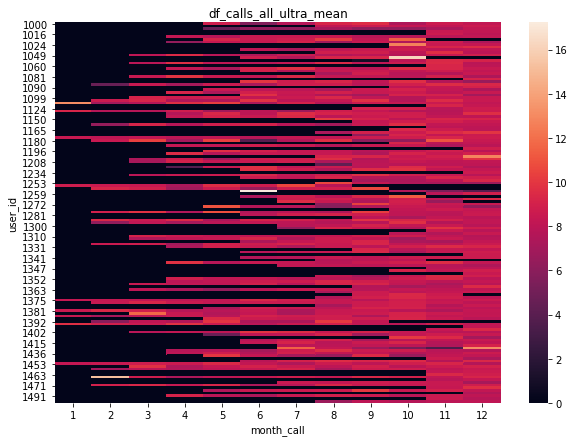

In [29]:
# Для тарифного плана ultra определим среднемесячную длительность вызовов 
# и выведим значение на тепловую карту
df_calls_all_ultra_mean = df_calls_all[df_calls_all['tariff'] == 'ultra'].pivot_table(index='user_id', columns='month_call', values='duration', aggfunc='mean')
df_calls_all_ultra_mean = df_calls_all_ultra_mean.fillna(0)

plt.figure(figsize=(10, 7))
heatmap = sms.heatmap(df_calls_all_ultra_mean)
heatmap.set_title('df_calls_all_ultra_mean')
plt.show()

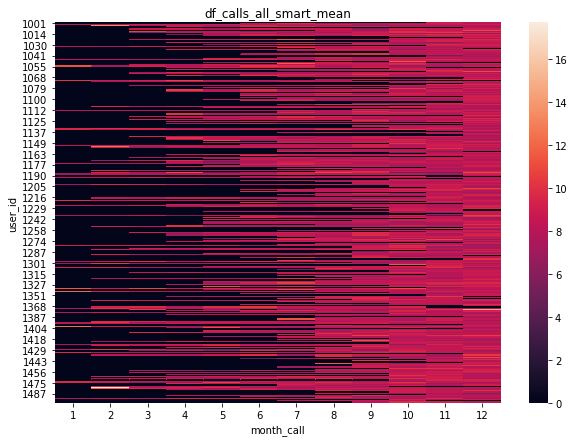

In [30]:
# Для тарифного плана smart определим среднемесячную длительность вызовов 
# и выведим значение на тепловую карту
df_calls_all_smart_mean = df_calls_all[df_calls_all['tariff'] == 'smart'].pivot_table(index='user_id', columns='month_call', values='duration', aggfunc='mean')
df_calls_all_smart_mean = df_calls_all_smart_mean.fillna(0)

plt.figure(figsize=(10, 7))
heatmap = sms.heatmap(df_calls_all_smart_mean)
heatmap.set_title('df_calls_all_smart_mean')
plt.show()

**Количество отправленных сообщений по месяцам**

- Добавим в таблицу `messedges` столбцы `city`, `tariff` из таблицы `users`

In [31]:
# Добавим в таблицу messages столбцы city tariffиз таблицы users
df_messages_all = df_messages.merge(df_users, on='user_id', how='left')
df_messages_all.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis=1, inplace=True)

In [32]:
display(df_messages_all.head())

,id,message_date,user_id,month_messag,city,tariff
0,1000_0,2018-06-27,1000,6,Краснодар,ultra
1,1000_1,2018-10-08,1000,10,Краснодар,ultra
2,1000_2,2018-08-04,1000,8,Краснодар,ultra
3,1000_3,2018-06-16,1000,6,Краснодар,ultra
4,1000_4,2018-12-05,1000,12,Краснодар,ultra


**Для каждого тприфного плана провдем анализ количества отправленных сообщений в месяц**

Сравним количество отправленных сообщений для тарфов `ultra` и `smart`

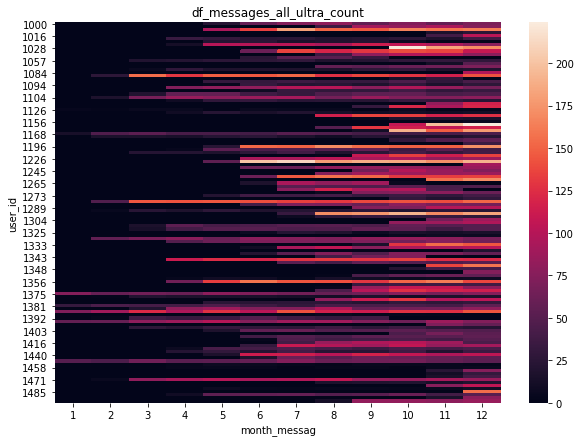

In [33]:
# Для тарифного плана ultra определим количество отправленных сообщений в месяц
# и выведим значение на тепловую карту
df_messages_all_ultra_count = df_messages_all[df_messages_all['tariff'] == 'ultra'].pivot_table(index='user_id', columns='month_messag', values='city', aggfunc='count')
df_messages_all_ultra_count = df_messages_all_ultra_count.fillna(0)

plt.figure(figsize=(10, 7))
heatmap = sms.heatmap(df_messages_all_ultra_count)
heatmap.set_title('df_messages_all_ultra_count')
plt.show()

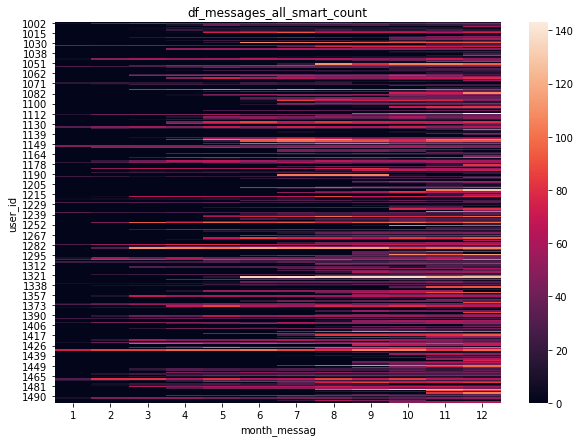

In [34]:
# Для тарифного плана smart определим количество отправленных сообщений в месяц
# и выведим значение на тепловую карту
df_messages_all_smart_count = df_messages_all[df_messages_all['tariff'] == 'smart'].pivot_table(index='user_id', columns='month_messag', values='city', aggfunc='count')
df_messages_all_smart_count = df_messages_all_smart_count.fillna(0)

plt.figure(figsize=(10, 7))
heatmap = sms.heatmap(df_messages_all_smart_count)
heatmap.set_title('df_messages_all_smart_count')
plt.show()

**Объем израсходованного интернет-трафика по месяцам;**

- Добавим в таблицу `internet` столбцы `city`, `tariff` из таблицы `users`

In [35]:
# Добавим в таблицу internet столбцы city tariff из таблицы users
df_internet_all = df_internet.merge(df_users, on='user_id', how='left')
df_internet_all.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis=1, inplace=True)

In [36]:
display(df_internet_all.head())

,Unnamed: 0,id,mb_used,session_date,user_id,month_session,city,tariff
0,0,1000_0,112.95,2018-11-25,1000,11,Краснодар,ultra
1,1,1000_1,1052.81,2018-09-07,1000,9,Краснодар,ultra
2,2,1000_2,1197.26,2018-06-25,1000,6,Краснодар,ultra
3,3,1000_3,550.27,2018-08-22,1000,8,Краснодар,ultra
4,4,1000_4,302.56,2018-09-24,1000,9,Краснодар,ultra


**Для каждого тприфного плана провдем анализ израсходованного интернет-трафика в месяц**

Сравним объем израсходованного интернет-трафика для тарфов `ultra` и `smart`

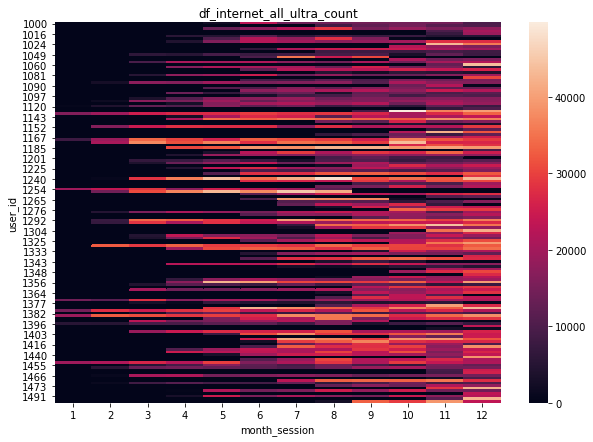

In [37]:
# Для тарифного плана ultra определим объем израсходованного интернет-трафика в месяц
# и выведим значение на тепловую карту
df_internet_all_ultra_count = df_internet_all[df_internet_all['tariff'] == 'ultra'].pivot_table(index='user_id', columns='month_session', values='mb_used', aggfunc='sum')
df_internet_all_ultra_count = df_internet_all_ultra_count.fillna(0)

plt.figure(figsize=(10, 7))
heatmap = sms.heatmap(df_internet_all_ultra_count)
heatmap.set_title('df_internet_all_ultra_count')
plt.show()

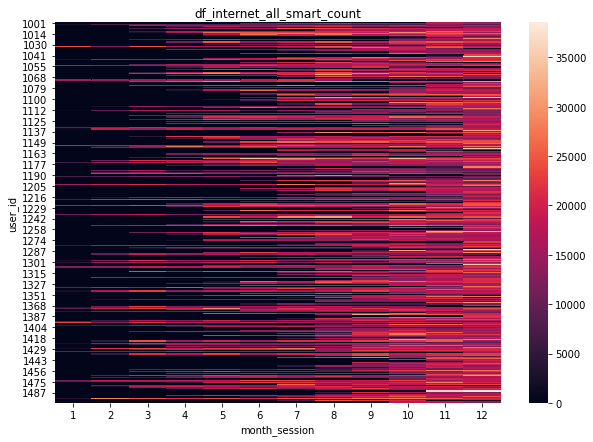

In [38]:
# Для тарифного плана smart определим объем израсходованного интернет-трафикай в месяц
# и выведим значение на тепловую карту
df_internet_all_smart_count = df_internet_all[df_internet_all['tariff'] == 'smart'].pivot_table(index='user_id', columns='month_session', values='mb_used', aggfunc='sum')
df_internet_all_smart_count = df_internet_all_smart_count.fillna(0)

plt.figure(figsize=(10, 7))
heatmap = sms.heatmap(df_internet_all_smart_count)
heatmap.set_title('df_internet_all_smart_count')
plt.show()

### Выводы по подготовке данных <a id='2f'></a>
​
В результате подготовки, данные приведены к нужным типам. Введены дополнительные категории: месяц получения услуги, проведено округления длительности вызова в большую сторону.
​
Для каждого абонента подсчитаны следующий показатели:
- количество совершенных вызовов и израсходованных минут по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
​
На основании выделенных показателей построены тепловые карты, которые позволяют сделать предварительные выводы:
- Средняя длительность вызовов на всех тарифных планах примерно одинаковая, при этом, на тарифном плане `ultra` количество вызовов больше, что может свидетельствовать о бОльшем объеме голосового трафика на тарифном плане `ultra`
- На тарифном плане `ultra` больше количество сообщений и больше объем интернет-трафика, что может свидетельствовать о более высоких расходах абонентов на тарифном плане `ultra`

## Анализ данных <a id='3'></a>

Создадим функции для построения гисторгамм

In [39]:
# Создадим функцию для расчета границ потроения гистрграммы
def range_lim (s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3-q1
    low  = q1-1.5*iqr
    high = q3+1.5*iqr
    return (int(low), int(high))

# Напишем функцию для построенимя типовых гимтограмм с учетом границ
def hist_pattern(df, bi, title):
    df.hist(bins=bi, range=(range_lim(df)), figsize=(10,7))
    plt.title(title)
    return plt.show()

# Напишем функцию для построенимя двойных гимтограмм без учет границ
def hist_pattern_dabl(df_1, df_2, bi, label, title):
    plt.figure(figsize=(10, 7))
    plt.hist([df_1, df_2], bins=bi, label=label)
    plt.legend()
    plt.title(title)
    return plt.show()

### Расчет статистических показателей для голосового трафика <a id='3.1'></a>

Проведем группировку количества и длительности **вызовов** для каждого тарифного плана. Расчитаем показатели среднего значения, дисперсии и стандартного отклонения 

In [40]:
# Сгруппируем удельные показатели вызовов для тарифного плана ultra
df_calls_all_ultra_all = df_calls_all[df_calls_all['tariff'] == 'ultra'].groupby(['month_call', 'user_id']).agg({'duration':['sum', 'count']})
df_calls_all_ultra_all.columns = ['sum', 'count']
display(df_calls_all_ultra_all.head())

sum  count
month_call user_id               
1          1120      52.72      4
           1126     258.44     28
           1168     264.41     31
           1254     439.01     50
           1375     802.11     96

In [41]:
# Сгруппируем удельные показатели вызовов для тарифного плана smart
df_calls_all_smart_all = df_calls_all[df_calls_all['tariff'] == 'smart'].groupby(['month_call', 'user_id']).agg({'duration':['sum', 'count']})
df_calls_all_smart_all.columns = ['sum', 'count']
display(df_calls_all_smart_all.head())

sum  count
month_call user_id               
1          1005      90.93     11
           1032     359.16     44
           1045       8.33      1
           1055     527.95     47
           1071     183.96     18

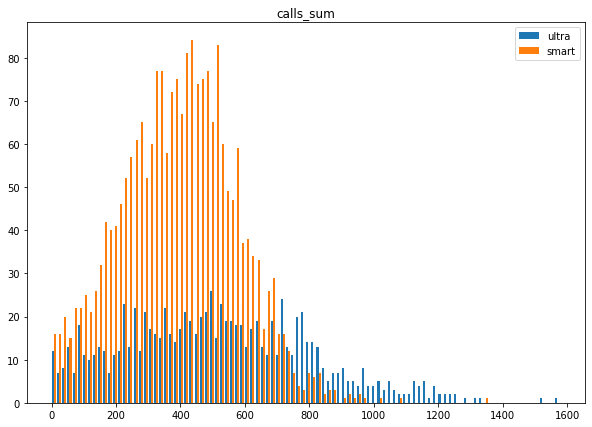

In [42]:
# Построим двойную гистограмму для длятельности звонков по обоим тарифным планам
hist_pattern_dabl(df_calls_all_ultra_all['sum'], df_calls_all_smart_all['sum'], 100, ['ultra', 'smart'], 'calls_sum')

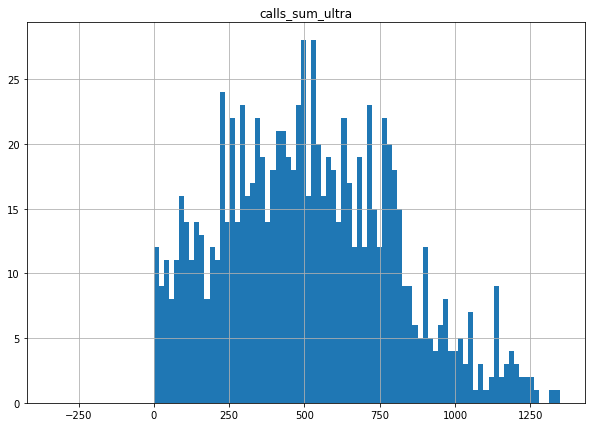

In [43]:
# Построим гистограмму для длятельности звонков тарифа ultra
hist_pattern(df_calls_all_ultra_all['sum'], 100, 'calls_sum_ultra')

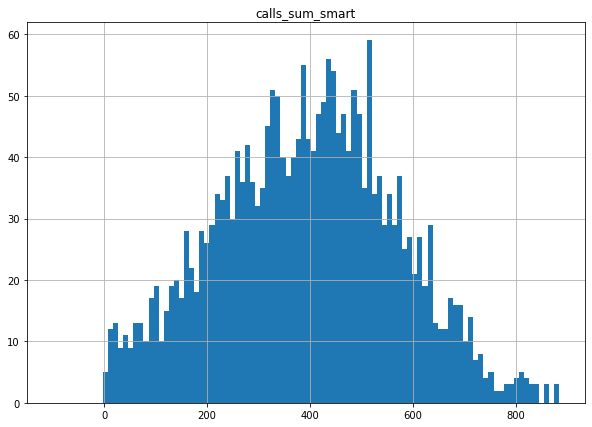

In [44]:
# Построим гистограмму для длятельности звонкои тарифа smart
hist_pattern(df_calls_all_smart_all['sum'], 100, 'calls_sum_smart')

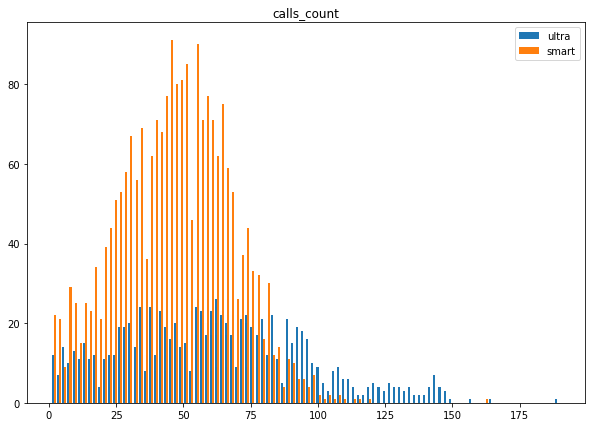

In [45]:
# Построим двойную гистограмму для количества звонков по обоим тарифным планам
hist_pattern_dabl(df_calls_all_ultra_all['count'], df_calls_all_smart_all['count'], 100, ['ultra', 'smart'], 'calls_count')

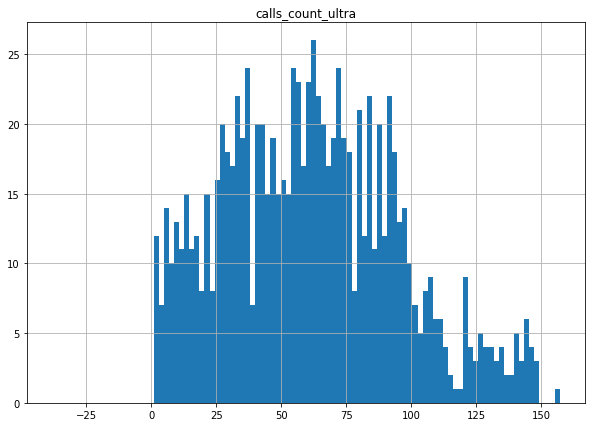

In [46]:
# Построим гистограмму для количества звонков тарифа ultra
hist_pattern(df_calls_all_ultra_all['count'], 100, 'calls_count_ultra')

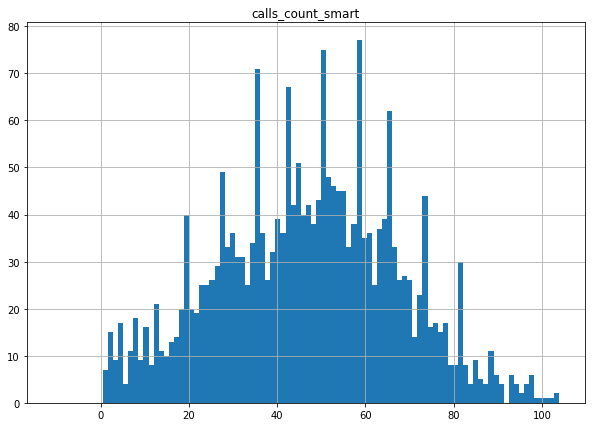

In [47]:
# Построим гистограмму для колтчества звонков тарифа smart
hist_pattern(df_calls_all_smart_all['count'], 100, 'calls_count_smart')

In [48]:
# Создадим cписки для записи значений показателей
tp_ultra_cell_count = []
tp_smart_cell_count = []
tp_ultra_cell_sum = []
tp_smart_cell_sum = []

In [49]:
# Рассчиаем показатели количества вызовов для ТП ultra
tp_ultra_cell_count.append(df_calls_all_ultra_all['count'].mean())
tp_ultra_cell_count.append(np.var(df_calls_all_ultra_all['count'], ddof=1))
tp_ultra_cell_count.append(np.std(df_calls_all_ultra_all['count'], ddof=1))

In [50]:
# Рассчиаем показатели количества вызовов для ТП smart
tp_smart_cell_count.append(df_calls_all_smart_all['count'].mean())
tp_smart_cell_count.append(np.var(df_calls_all_smart_all['count'], ddof=1))
tp_smart_cell_count.append(np.std(df_calls_all_smart_all['count'], ddof=1))

In [51]:
# Рассчиаем показатели длительности вызовов для ТП ultra
tp_ultra_cell_sum.append(df_calls_all_ultra_all['sum'].mean())
tp_ultra_cell_sum.append(np.var(df_calls_all_ultra_all['sum'], ddof=1))
tp_ultra_cell_sum.append(np.std(df_calls_all_ultra_all['sum'], ddof=1))

In [52]:
# Рассчиаем показатели длительности вызовов для ТП smart
tp_smart_cell_sum.append(df_calls_all_smart_all['sum'].mean())
tp_smart_cell_sum.append(np.var(df_calls_all_smart_all['sum'], ddof=1))
tp_smart_cell_sum.append(np.std(df_calls_all_smart_all['sum'], ddof=1))

### Расчет статистических показателей для сообщений <a id='3.2'></a>

Проведем группировку количества отправленных за месяц **сообщений** для каждого тарифного плана. Расчитаем показатели среднего значения, дисперсии и стандартного отклонения 

In [53]:
# Сгруппируем удельные показатели отправленных за месяц сообщений для тарифного плана ultra
df_messages_all_ultra_all = df_messages_all[df_messages_all['tariff'] == 'ultra'].groupby(['month_messag', 'user_id']).agg({'city':['count']})
df_messages_all_ultra_all.columns = ['count']
display(df_messages_all_ultra_all.head())

count
month_messag user_id       
1            1126         4
             1168        14
             1375        75
             1381        32
             1385        72

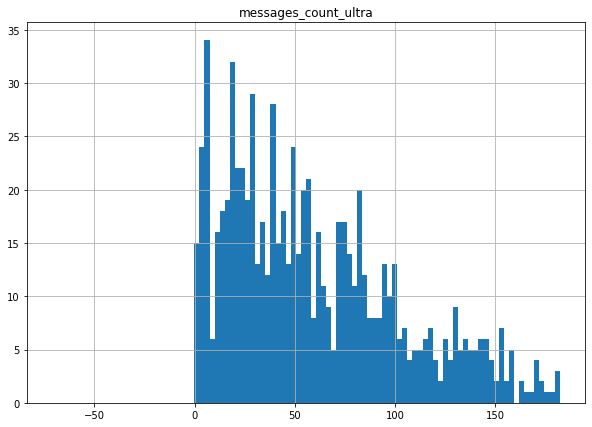

In [54]:
# Построим гистограмму для колтчества сообщений
hist_pattern(df_messages_all_ultra_all['count'], 100, 'messages_count_ultra')

In [55]:
# Сгруппируем удельные показатели отправленных за месяц сообщений для тарифного плана smart
df_messages_all_smart_all = df_messages_all[df_messages_all['tariff'] == 'smart'].groupby(['month_messag', 'user_id']).agg({'city':['count']})
df_messages_all_smart_all.columns = ['count']
display(df_messages_all_smart_all.head())

count
month_messag user_id       
1            1005         7
             1032        38
             1045         5
             1055        30
             1071        16

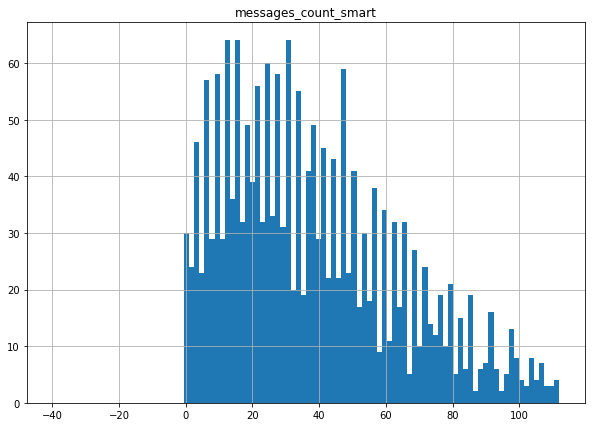

In [56]:
# Построим гистограмму для колтчества сообщений
hist_pattern(df_messages_all_smart_all['count'], 100, 'messages_count_smart')

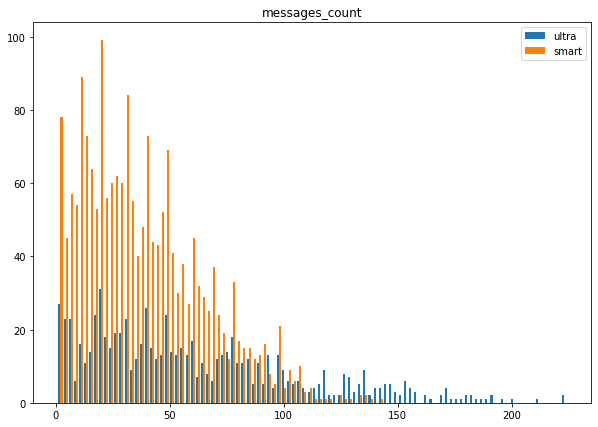

In [57]:
# Построим двойную гистограмму для количества сообщений по обоим тарифным планам
hist_pattern_dabl(df_messages_all_ultra_all['count'], df_messages_all_smart_all['count'], 100, ['ultra', 'smart'], 'messages_count')

In [58]:
# Создадим cписки для записи значений показателей
tp_ultra_messages = []
tp_smart_messages = []

In [59]:
# Рассчиаем показатели количества отправленных за месяц сообщений для ТП ultra
tp_ultra_messages.append(df_messages_all_ultra_all['count'].mean())
tp_ultra_messages.append(np.var(df_messages_all_ultra_all['count'], ddof=1))
tp_ultra_messages.append(np.std(df_messages_all_ultra_all['count'], ddof=1))

In [60]:
# Рассчиаем показатели количества отправленных за месяц сообщений для ТП smart
tp_smart_messages.append(df_messages_all_smart_all['count'].mean())
tp_smart_messages.append(np.var(df_messages_all_smart_all['count'], ddof=1))
tp_smart_messages.append(np.std(df_messages_all_smart_all['count'], ddof=1))

### Расчет статистических показателей для интернет трафика <a id='3.3'></a>

Проведем группировку объема израсходованного интернет-трафика за месяц для каждого тарифного плана. Расчитаем показатели среднего значения, дисперсии и стандартного отклонения

In [61]:
# Сгруппируем показатели объема израсходованного интернет-трафика за месяц для тарифного плана ultra
df_internet_all_ultra_all = df_internet_all[df_internet_all['tariff'] == 'ultra'].groupby(['month_session', 'user_id']).agg({'mb_used':['sum']})
df_internet_all_ultra_all.columns = ['sum']
df_internet_all_ultra_all['sum_gb'] = df_internet_all_ultra_all['sum'] / 1024
display(df_internet_all_ultra_all.head())

sum     sum_gb
month_session user_id                     
1             1120       656.75   0.641357
              1126     16363.03  15.979521
              1168      8152.07   7.961006
              1254     19685.01  19.223643
              1375     14550.66  14.209629

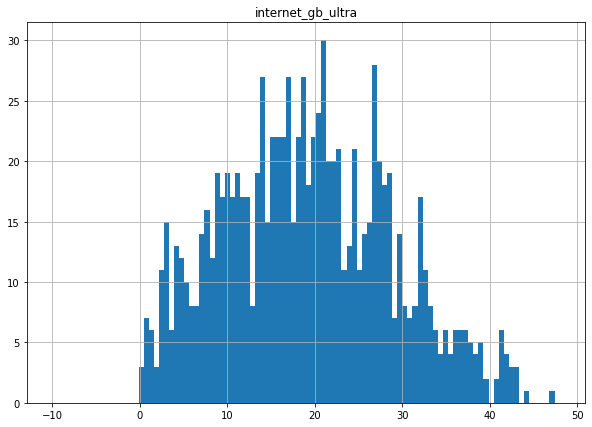

In [62]:
# Построим гистограмму для объема трафика
hist_pattern(df_internet_all_ultra_all['sum_gb'], 100, 'internet_gb_ultra')

In [63]:
# Сгруппируем показатели объема израсходованного интернет-трафика за месяц сообщений для тарифного плана smart
df_internet_all_smart_all = df_internet_all[df_internet_all['tariff'] == 'smart'].groupby(['month_session', 'user_id']).agg({'mb_used':['sum']})
df_internet_all_smart_all.columns = ['sum']
df_internet_all_smart_all['sum_gb'] = df_internet_all_smart_all['sum'] / 1024
display(df_internet_all_smart_all.head())

sum     sum_gb
month_session user_id                     
1             1005      2727.97   2.664033
              1032     24127.69  23.562197
              1045      2346.71   2.291709
              1055     17090.88  16.690313
              1071     15604.34  15.238613

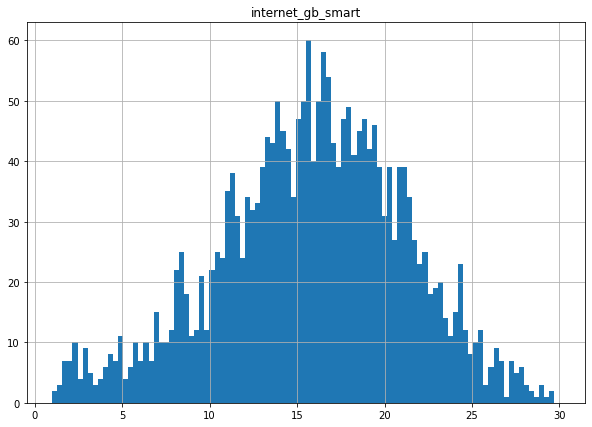

In [64]:
# Построим гистограмму для объема трафика
hist_pattern(df_internet_all_smart_all['sum_gb'], 100, 'internet_gb_smart')

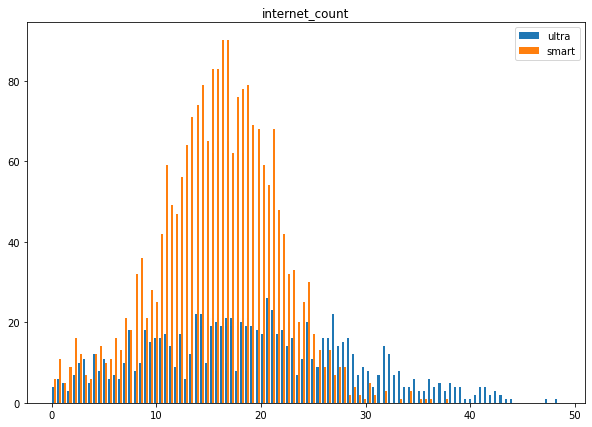

In [65]:
# Построим двойную гистограмму для объема трафика по обоим тарифным планам
hist_pattern_dabl(df_internet_all_ultra_all['sum_gb'], df_internet_all_smart_all['sum_gb'], 100, ['ultra', 'smart'], 'internet_count')

In [66]:
# Создадим cписки для записи значений показателей
tp_ultra_internet = []
tp_smart_internet = []

In [67]:
# Рассчиаем показатели объема израсходованного интернет-трафика за месяц сообщений для ТП ultra
tp_ultra_internet.append(df_internet_all_ultra_all['sum_gb'].mean())
tp_ultra_internet.append(np.var(df_internet_all_ultra_all['sum_gb'], ddof=1))
tp_ultra_internet.append(np.std(df_internet_all_ultra_all['sum_gb'], ddof=1))

In [68]:
# Рассчиаем показатели объема израсходованного интернет-трафика за месяц сообщений для ТП smart
tp_smart_internet.append(df_internet_all_smart_all['sum_gb'].mean())
tp_smart_internet.append(np.var(df_internet_all_smart_all['sum_gb'], ddof=1))
tp_smart_internet.append(np.std(df_internet_all_smart_all['sum_gb'], ddof=1))

### Сведение показателей среднего количества, дисперсии и стандартного отклонения в общую таблицу <a id='3.4'></a>

Выведем все статистические показатели в одну таблицу

In [69]:
# Выведем все статистические показатели в одну таблицу
df_stat = pd.DataFrame({
    'indicator': ['mean', 'variance', 'std'], 
    'ultra_cell_count': tp_ultra_cell_count, 
    'smart_cell_count': tp_smart_cell_count,
    'ultra_cell_sum': tp_ultra_cell_sum,
    'smart_cell_sum': tp_smart_cell_sum,
    'ultra_messages': tp_ultra_messages,
    'smart_messages': tp_smart_messages,
    'ultra_internet': tp_ultra_internet,
    'snart_internet': tp_smart_internet
})
display(df_stat)

,indicator,ultra_cell_count,smart_cell_count,ultra_cell_sum,smart_cell_sum,ultra_messages,smart_messages,ultra_internet,snart_internet
0,mean,61.613516,47.116614,517.013939,395.847744,61.161006,38.716441,19.207505,15.835607
1,variance,1168.901212,436.270629,83232.298905,31940.462096,2109.659183,717.594201,94.284295,32.768203
2,std,34.189197,20.887092,288.500085,178.718947,45.931026,26.787949,9.710010,5.724352


### Объединение таблиц и расчет расходов абонентов <a id='3.5'></a>

**Создание таблицы вызовов каждого абонента в месяц**
1. Сгруппировать по ID-номеру абонента и месяцу использования тарифного плана
2. Рассчитать данные о сумме использованных минут каждым абонентом за месяц

In [70]:
# Рассчитаем данные о сумме использованных минут каждым абонентом за месяц
df_calls_all_short = df_calls_all.groupby(['user_id', 'month_call', 'tariff', 'city'])['duration_up'].sum().reset_index()

In [71]:
# Изменим название итогового столбца
df_calls_all_short.columns = ['user_id', 'month_call', 'tariff', 'city', 'all_call']

# В итоговом столбце изменим тип данных на int
df_calls_all_short['all_call'] = df_calls_all_short['all_call'].astype('int')

In [72]:
# Проверить на наличие дубликатов
df_calls_all_short.duplicated().sum()

0

In [73]:
display(df_calls_all_short.head())

,user_id,month_call,tariff,city,all_call
0,1000,5,ultra,Краснодар,159
1,1000,6,ultra,Краснодар,172
2,1000,7,ultra,Краснодар,340
3,1000,8,ultra,Краснодар,408
4,1000,9,ultra,Краснодар,466


In [74]:
df_calls_all_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     3168 non-null   int64 
 1   month_call  3168 non-null   int64 
 2   tariff      3168 non-null   object
 3   city        3168 non-null   object
 4   all_call    3168 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 123.9+ KB


**Создание таблицы сообщений каждого абонента в месяц**
1. Сгруппировать по ID-номеру абонента и месяцу использования тарифного плана
2. Рассчитать данные о количестве сообщений каждым абонентом за месяц

In [75]:
# Рассчитаем данные о количестве сообщений каждым абонентом за месяц
df_messages_all_short = df_messages_all.groupby(['user_id', 'month_messag', 'tariff'])['city'].count().reset_index()

In [76]:
# Изменим название итогового столбца
df_messages_all_short.columns = ['user_id', 'month_messag', 'tariff', 'all_messag']

# В итоговом столбце изменим тип данных на int
df_messages_all_short['all_messag'] = df_messages_all_short['all_messag'].astype('int')

In [77]:
# Проверить на наличие дубликатов
df_messages_all_short.duplicated().sum()

0

In [78]:
display(df_messages_all_short.head())

,user_id,month_messag,tariff,all_messag
0,1000,5,ultra,22
1,1000,6,ultra,60
2,1000,7,ultra,75
3,1000,8,ultra,81
4,1000,9,ultra,57


In [79]:
df_messages_all_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       2717 non-null   int64 
 1   month_messag  2717 non-null   int64 
 2   tariff        2717 non-null   object
 3   all_messag    2717 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 85.0+ KB


**Создание таблицы объема израсходованного интернет-трафика каждого абонента в месяц**
1. Сгруппировать по ID-номеру абонента и месяцу использования тарифного плана
2. Рассчитать данные об объеме израсходованного интернет-трафика каждым абонентом за месяц

In [80]:
# Рассчитаем данные об объеме израсходованного интернет-трафика каждым абонентом за месяц
df_internet_all_short = df_internet_all.groupby(['user_id', 'month_session', 'tariff', 'city'])['mb_used'].sum().reset_index()

In [81]:
# Изменим название итогового столбца
df_internet_all_short.columns = ['user_id', 'month_session', 'tariff', 'city', 'all_session']

# В итоговом столбце изменим тип данных на int
df_internet_all_short['all_session'] = df_internet_all_short['all_session'].astype('int')

In [82]:
# Проверить на наличие дубликатов
df_internet_all_short.duplicated().sum()

0

In [83]:
display(df_internet_all_short.head())

,user_id,month_session,tariff,city,all_session
0,1000,5,ultra,Краснодар,2253
1,1000,6,ultra,Краснодар,23233
2,1000,7,ultra,Краснодар,14003
3,1000,8,ultra,Краснодар,14055
4,1000,9,ultra,Краснодар,14568


In [84]:
df_internet_all_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        3203 non-null   int64 
 1   month_session  3203 non-null   int64 
 2   tariff         3203 non-null   object
 3   city           3203 non-null   object
 4   all_session    3203 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 125.2+ KB


**Объединение таблиц вызовов, сообщений и объема израсходованного интернет-трафика.**

In [85]:
# Удалим лишние столбцы (tariff и city)
df_calls_all_short.drop(['tariff', 'city'], axis=1, inplace=True)
df_messages_all_short.drop(['tariff'], axis=1, inplace=True)
df_internet_all_short.drop(['tariff', 'city'], axis=1, inplace=True)

# Подготовим таблицу df_users
df_users_short = df_users.loc[:, ['user_id', 'tariff', 'city']]

# Унифицируем название столбцов
df_calls_all_short.columns = ['user_id', 'month', 'calls']
df_messages_all_short.columns = ['user_id', 'month', 'messags']
df_internet_all_short.columns = ['user_id', 'month', 'sessions']

In [86]:
#№ Объединим все таблицы по столбцу conc
df_all_short_1 = df_calls_all_short.merge(df_messages_all_short, on=['user_id', 'month'], how='outer')
df_all_short_2 = df_all_short_1.merge(df_internet_all_short, on=['user_id', 'month'], how='outer')
df_all_short = df_all_short_2.merge(df_users_short, on='user_id', how='left')

In [87]:
# Заменим все пропуски на 0
df_all_short = df_all_short.fillna(0)

In [88]:
display(df_all_short.head())

,user_id,month,calls,messags,sessions,tariff,city
0,1000,5,159.0,22.0,2253.0,ultra,Краснодар
1,1000,6,172.0,60.0,23233.0,ultra,Краснодар
2,1000,7,340.0,75.0,14003.0,ultra,Краснодар
3,1000,8,408.0,81.0,14055.0,ultra,Краснодар
4,1000,9,466.0,57.0,14568.0,ultra,Краснодар


In [89]:
df_all_short.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   3214 non-null   int64  
 1   month     3214 non-null   int64  
 2   calls     3214 non-null   float64
 3   messags   3214 non-null   float64
 4   sessions  3214 non-null   float64
 5   tariff    3214 non-null   object 
 6   city      3214 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 200.9+ KB


In [90]:
# Подготовим таблицу tariffs
df_tariffs['gb_per_month_included'] = df_tariffs['mb_per_month_included'] / 1024
df_tariffs['gb_per_month_included'] = df_tariffs['gb_per_month_included'].astype('int')
df_tariffs.drop(['mb_per_month_included'], axis=1, inplace=True)
df_tariffs = df_tariffs.rename(columns={'tariff_name': 'tariff'})
display(df_tariffs.head())

,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff,gb_per_month_included
0,50,500,550,200,3,3,smart,15
1,1000,3000,1950,150,1,1,ultra,30


In [91]:
# Объединим таблицы df_all_short и df_tariffs
df_all_short_tariffs = df_all_short.merge(df_tariffs, on='tariff',how='left')
df_all_short_tariffs.head()

,user_id,month,calls,messags,sessions,tariff,city,messages_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,5,159.0,22.0,2253.0,ultra,Краснодар,1000,3000,1950,150,1,1,30
1,1000,6,172.0,60.0,23233.0,ultra,Краснодар,1000,3000,1950,150,1,1,30
2,1000,7,340.0,75.0,14003.0,ultra,Краснодар,1000,3000,1950,150,1,1,30
3,1000,8,408.0,81.0,14055.0,ultra,Краснодар,1000,3000,1950,150,1,1,30
4,1000,9,466.0,57.0,14568.0,ultra,Краснодар,1000,3000,1950,150,1,1,30


In [92]:
# Создадим функцию для определения перерасхода минут, сообщений и интернета
def no_limit (f, t):
    if (f - t) <= 0:
        return 0
    else:
        return (f - t)

In [93]:
# Создадим столлбцы с указанием перерасхода минут, сообщений и интернета
df_all_short_tariffs['calls_no_lim'] = df_all_short_tariffs.apply(lambda x: no_limit(x.calls, x.minutes_included), axis=1)
df_all_short_tariffs['messags_no_lim'] = df_all_short_tariffs.apply(lambda x: no_limit(x.messags, x.messages_included), axis=1)
df_all_short_tariffs['sessions_no_lim'] = df_all_short_tariffs.apply(lambda x: no_limit(x.sessions, x.gb_per_month_included), axis=1)

In [94]:
# Рассчитаем месячные расходы каждого абонента
df_all_short_tariffs['user_cost'] = df_all_short_tariffs['rub_monthly_fee'] + (
    (df_all_short_tariffs['calls_no_lim'] * df_all_short_tariffs['rub_per_minute']) +
    (df_all_short_tariffs['messags_no_lim'] * df_all_short_tariffs['rub_per_message']) +
    (df_all_short_tariffs['sessions_no_lim'] * df_all_short_tariffs['rub_per_gb'])
)

# Заменим тип данных в основных чтобцах на int
df_all_short_tariffs['user_cost'] = df_all_short_tariffs['user_cost'].astype('int')
df_all_short_tariffs['calls'] = df_all_short_tariffs['calls'].astype('int')
df_all_short_tariffs['messags'] = df_all_short_tariffs['messags'].astype('int')
df_all_short_tariffs['sessions'] = df_all_short_tariffs['sessions'].astype('int')

In [95]:
# Убкрем лишние столбцы
df_all_short_tariffs = df_all_short_tariffs.loc[:, ['calls', 'messags', 'sessions', 'user_id', 'month', 'city', 'tariff', 'user_cost']]

In [96]:
display(df_all_short_tariffs.head())

,calls,messags,sessions,user_id,month,city,tariff,user_cost
0,159,22,2253,1000,5,Краснодар,ultra,335400
1,172,60,23233,1000,6,Краснодар,ultra,3482400
2,340,75,14003,1000,7,Краснодар,ultra,2097900
3,408,81,14055,1000,8,Краснодар,ultra,2105700
4,466,57,14568,1000,9,Краснодар,ultra,2182650


### Сведение статистических показателей среднемесячных расходов абонентов <a id='3.6'></a>

Сформируем статистические показатели расходов в одной таблице 

In [97]:
# Создадим cписки для записи значений показателей
tp_ultra_cost = []
tp_smart_cost = []
tp_msc_cost = []
tp_reg_cost = []

# Выделем расходы по тарифам
df_all_short_tariffs_ultra = df_all_short_tariffs.loc[df_all_short_tariffs['tariff'] == 'ultra']
df_all_short_tariffs_smart = df_all_short_tariffs.loc[df_all_short_tariffs['tariff'] == 'smart']

# Выделем расходы по городам
df_all_short_city_msc = df_all_short_tariffs.loc[df_all_short_tariffs['city'] == 'Москва']
df_all_short_city_reg = df_all_short_tariffs.loc[df_all_short_tariffs['city'] != 'Москва']

In [98]:
# Рассчиаем показатели расходов за месяц для ТП ultra
tp_ultra_cost.append(df_all_short_tariffs_ultra['user_cost'].mean())
tp_ultra_cost.append(np.var(df_all_short_tariffs_ultra['user_cost'], ddof=1))
tp_ultra_cost.append(np.std(df_all_short_tariffs_ultra['user_cost'], ddof=1))

In [99]:
# Рассчиаем показатели расходов за месяц для ТП smart
tp_smart_cost.append(df_all_short_tariffs_smart['user_cost'].mean())
tp_smart_cost.append(np.var(df_all_short_tariffs_smart['user_cost'], ddof=1))
tp_smart_cost.append(np.std(df_all_short_tariffs_smart['user_cost'], ddof=1))

In [100]:
# Рассчиаем показатели расходов за месяц для Москвы
tp_msc_cost.append(df_all_short_city_msc['user_cost'].mean())
tp_msc_cost.append(np.var(df_all_short_city_msc['user_cost'], ddof=1))
tp_msc_cost.append(np.std(df_all_short_city_msc['user_cost'], ddof=1))

In [101]:
# Рассчиаем показатели расходов за месяц для регионов
tp_reg_cost.append(df_all_short_city_reg['user_cost'].mean())
tp_reg_cost.append(np.var(df_all_short_city_reg['user_cost'], ddof=1))
tp_reg_cost.append(np.std(df_all_short_city_reg['user_cost'], ddof=1))

In [102]:
# Выведем статистические показатели по расходам в одну таблицу
df_stat_cost = pd.DataFrame({
    'indicator': ['mean', 'variance', 'std'], 
    'ultra_cost': tp_ultra_cost, 
    'smart_cost': tp_smart_cost,
    'msc_cost': tp_msc_cost,
    'reg_cost': tp_reg_cost
})
display(df_stat_cost)

,indicator,ultra_cost,smart_cost,msc_cost,reg_cost
0,mean,2.917749e+06,3.239271e+06,3.198058e+06,3.127277e+06
1,variance,2.289106e+12,1.378601e+12,1.586273e+12,1.700429e+12
2,std,1.512979e+06,1.174138e+06,1.259473e+06,1.304005e+06


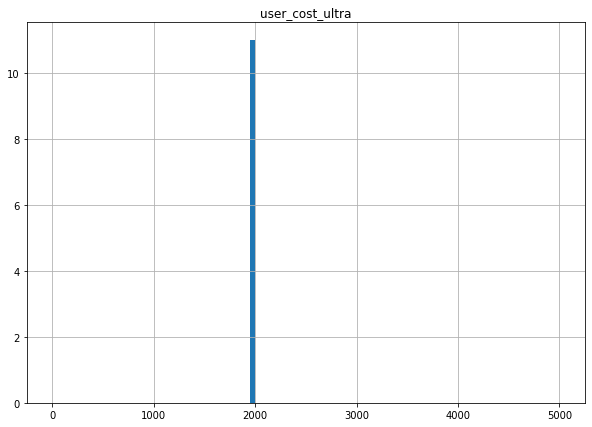

In [103]:
# Построим гистограмму для расходов абонентов
df_all_short_tariffs_ultra['user_cost'].hist(bins=100, range=(0, 5000), figsize=(10,7))
plt.title('user_cost_ultra')
plt.show()

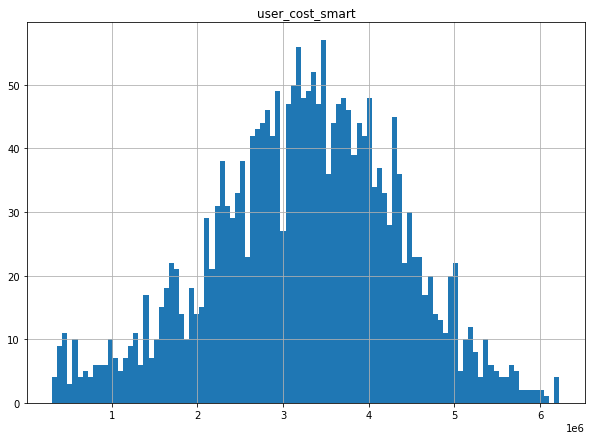

In [104]:
# Построим гистограмму для расходов абонентов
hist_pattern(df_all_short_tariffs_smart['user_cost'], 100, 'user_cost_smart')

### Выводы по анализу данных <a id='3f'></a>

Сравнительный анализ среднемесячных показателей голосового трафика абонентов рассматриваемых тарифных планов показал, что на тарифном плане `ultra` средний звонок имеет длительность от 8 до 9 минут. При этом, абоненты тарифного плана `ultra` совершают от 50 до 75 вызовов в месяц. На тарифном плане `smart` средний звонок имеет примерно сопоставимую длительность - от 8 до 9 минут. Однако, абоненты тарифного плана `smart` совершают меньшее количество вызовов - от 40 до 60 в месяц. Данный факт говорит о меньшем объеме потребляемого голосового трафика абонентов тарифного плана `smart` по сравнению с абонентами тарифного плана `ultra`.

Сравнительный анализ среднемесячных показателей количества отправленных сообщений абонентов рассматриваемых тарифных планов показал, что на тарифном плане `ultra` средний абонент отправляет до 50 сообщений в месяц. В тоже время, на тарифном плане `smart` средний абонент отправляет до 30 сообщений в месяц. Данный факт показывает более высокую активность абонентов тарифного плана `ultra` при потреблении услуг отправки сообщений.

Сравнительный анализ среднемесячных показателей потребления интернет трафика абонентов рассматриваемых тарифных планов показал, что на тарифном плане `ultra` средний абонент скачивает за месяц от 15ГБ до  22ГБ интернет трафика. В тоже время, на тарифном плане `smart` средний абонент скачивает за месяц от 15ГБ до  18ГБ интернет трафика. Данный факт показывает более высокую активность абонентов тарифного плана `ultra` при потреблении интернет трафика.

Однако, учитывая условия тарифных планов, даже выявленное сниженное потребление услуг на тарифном плане `smart`, ведет к превышению бесплатного порогиа и дополнительным расходам абонентов. Так, абоненты тарифного плана `ultra` в месяц в среднем расходуют 2091 р, что на 7% выше размера абонентской платы. В тоже время абоненты тарифного плана smart в месяц в среднем расходуют 1407 р, что на 155% выше размера абонентской платы. Это нивелирует различия в суммах расходов абонентов рассматриваемых тарифных планов, что требует дальнейшего уточнения посредством статистического анализа.

## Проверка гипотез <a id='4'></a>

1. Проверить статистическую гипотезу о сопоставимости выручки различных тарифных планов
2. Проверить статистическую гипотезу о сопоставимости расходов на мобильную связь абонентов различных регионов.

### Проверка статистической гипотезы о сопоставимости выручки различных тарифных планов <a id='4.1'></a>

In [105]:
hip_1_null = 'Нет ни какого различия между средней выручкой абонентов тарифа «Ультра» и тарифа «Смарт»'
hip_1_alt = 'Существует различие между средней выручкой абонентов тарифов «Ультра» и «Смарт»'

In [106]:
ser_1 = df_all_short_tariffs_ultra['user_cost']
ser_2 = df_all_short_tariffs_smart['user_cost']

alpha = .05 # если p-value окажется меньше него - отвегнем нулевую гипотезу
results = st.ttest_ind(ser_1, ser_2, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue > alpha:
    print('Нулевая гипотеза:', hip_1_null)
else:
    print('Альтернативная гипотеза:', hip_1_alt) 

p-значение: 3.79907143173015e-09
Альтернативная гипотеза: Существует различие между средней выручкой абонентов тарифов «Ультра» и «Смарт»


### Проверка статистической гипотезы о сопоставимости расходов на мобильную связь абонентов различных регионов. <a id='4.2'></a>

In [107]:
hip_2_null = 'Между средней выручкой абоентов из Москвы и абонентов из других регионов нет ни какого различия'
hip_2_alt = 'Существуют различия между средней выручкой абоентов из Москвы и абонентов из других регионов'

In [108]:
ser_3 = df_all_short_city_msc['user_cost']
ser_4 = df_all_short_city_reg['user_cost']

alpha = .05 # если p-value окажется меньше него - отвегнем нулевую гипотезу
results = st.ttest_ind(ser_3, ser_4, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue > alpha:
    print('Нулевая гипотеза:', hip_2_null)
else:
    print('Альтернативная гипотеза:', hip_2_alt) 

p-значение: 0.21466139636678014
Нулевая гипотеза: Между средней выручкой абоентов из Москвы и абонентов из других регионов нет ни какого различия


### Выводы по проверке гипотез <a id='4f'></a>

Для уточнения различий между тарифными планами, была сформулирована статистическая гипотеза о сопоставимости выручки различных тарифных планов. Сравнительный параметр для оценки р-значения был выбран 0,05. В результате выявлено существенное различие в расходах абонентов тарифных планов `ultra` и `smart`.

Для уточнения различий между потреблением московских и региональных абонентов, была сформулирована статистическая гипотеза сопоставимости расходов на мобильную связь абонентов различных регионов. Сравнительный параметр для оценки р-значения был выбран 0,05. В результате существенного различия в расходах абонентов различных регионов не выявлено.

Следовательно, структура потребления абонентов различается от выбора тарифного плана, а не от региона проживания

## Общий вывод <a id='5'></a>

В результате проведенного исследования:

- Проведен сравнительный анализ среднемесячных расходов абонентов на услуги мобильной связи для различных тарифных планов
- Проведен сравнительный анализ среднемесячных показателей голосового трафика абонентов рассматриваемых тарифных планов
- Проведен сравнительный анализ среднемесячных показателей потребления услуг по отправке сообщений и по передачи данных абонентов рассматриваемых тарифных планов
- Проверены статистические гипотезы о сопоставимости выручки различных тарифных планов и о сопоставимости расходов на мобильную связь абонентов различных регионов.

На основании показателей среднемесячного потребления услуг сделаны выводы о бОльшем объеме голосового трафика на тарифном плане `ultra`, о бОльшкм количестве сообщений и объеме интернет-трафика, что свидетельствует о более высоких расходах абонентов на тарифном плане `ultra`

Однако, учитывая условия тарифных планов, даже выявленное сниженное потребление услуг на тарифном плане `smart`, ведет к превышению бесплатного порога и дополнительным расходам абонентов. Так, абоненты тарифного плана `ultra` в месяц в среднем расходуют 2091 р, что на 7% выше размера абонентской платы. В тоже время абоненты тарифного плана `smart` в месяц в среднем расходуют 1407 р, что на 155% выше размера абонентской платы. Это нивелирует различия в суммах расходов абонентов рассматриваемых тарифных планов, что требует дальнейшего уточнения посредством статистического анализа

Проверка статистической гипотезы о сопоставимости выручки различных тарифных планов выявила существенное различие в расходах абонентов тарифных планов `ultra` и `smart`.

Проверка статистической гипотезы сопоставимости расходов на мобильную связь абонентов различных регионов не выявила существенного различия в расходах абонентов различных регионов.

**Структура потребления абонентов различается от выбора тарифного плана, а не от региона проживания**

Поскольку среднее превышение фактических расходов абонентов относительно размера абонентской планы на тарифном плане `ultra` значительно меньше (7% против 155%), можно говорить о том, что, абоненты тарифного плана `ultra` как правило не используют предоплаченные услуги, что говорит о более высокой маржинальности данного тарифа.

**Более эффективным тарифным планом можно признать тарифный план ultra**